In [1]:
# ! pip install umap-learn
import torch
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from sklearn.cluster import Birch
import umap

In [11]:
with open('/home/lunet/cocp5/Documents/ShELLV22/deeprl-shell/CT/CT_optimal_100.pkl','rb') as f:
    embeddings=pickle.load(f)

In [12]:
embeddings.keys()

dict_keys(['I1R1P2', 'I1R2P2', 'I1R3P2', 'I1R4P2', 'I2R1P2', 'I2R2P2', 'I2R3P2', 'I2R4P2'])

In [13]:
data=[]
label=[]
for n,key in enumerate(embeddings.keys()):
    data.append(torch.stack(embeddings[key],0))
    label.append(n*np.ones((50,)))
data=torch.cat(data)
label=np.concatenate(label)
D = np.sqrt(((data.unsqueeze(1)-data.unsqueeze(0))**2).sum(2))
data = data.numpy()
um = umap.UMAP(n_neighbors=3, random_state=0).fit(data)
model= Birch(n_clusters=None,threshold=2.0,branching_factor=10)
model.fit(data)
centers=um.transform(model.subcluster_centers_)    

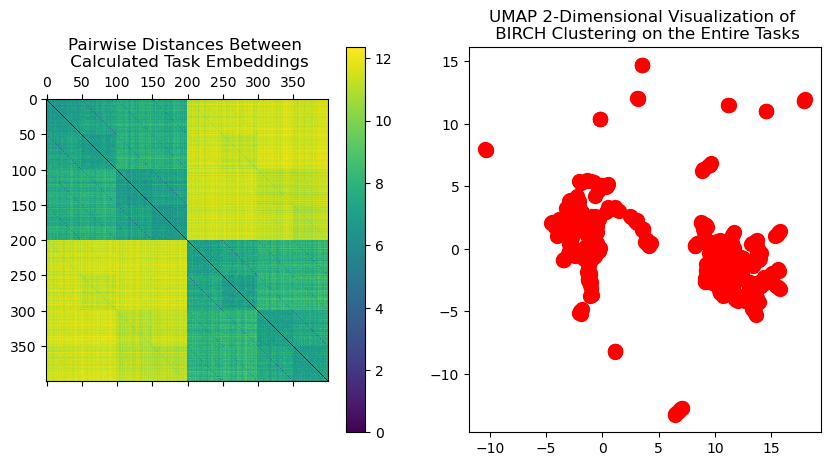

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
im1=ax[0].matshow(D)
fig.colorbar(im1, ax=ax[0], orientation='vertical')
ax[0].set_title('Pairwise Distances Between \n Calculated Task Embeddings')
ax[1].scatter(um.embedding_[:, 0], um.embedding_[:, 1], s= 5, c=label, cmap='Spectral')
ax[1].scatter(centers[:,0],centers[:,1],marker='o',s=100,c='r')
ax[1].set_title('UMAP 2-Dimensional Visualization of \n BIRCH Clustering on the Entire Tasks')
plt.savefig('/home/lunet/cocp5/Documents/ShELLV22/deeprl-shell/embedding.pdf', 
           bbox_inches='tight', 
            transparent=True,
            pad_inches=0)
plt.show()

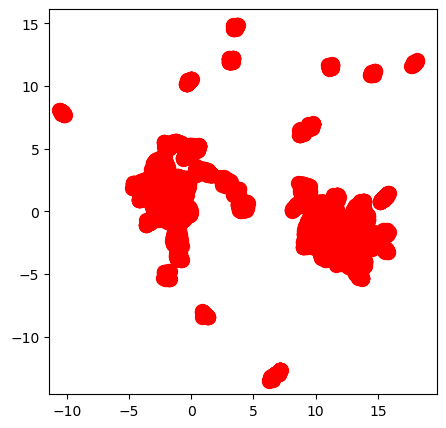

In [15]:
model= Birch(n_clusters=None,threshold=2.0,branching_factor=10)
fig = plt.figure(figsize=(5,5))
camera=Camera(fig)
for n,x in enumerate(data):    
    model.partial_fit(x[np.newaxis,:])    
    # fig = plt.figure(figsize=(5,5))
    plt.scatter(um.embedding_[:n, 0],um.embedding_[:n, 1],vmin=0,vmax=7,c=label[:n],alpha=.5)
    plt.xlim([1.1*um.embedding_[:, 0].min(),1.1*um.embedding_[:, 0].max()])
    plt.ylim([1.1*um.embedding_[:, 1].min(),1.1*um.embedding_[:, 1].max()])
    centers=um.transform(model.subcluster_centers_)    
    plt.scatter(centers[:,0],centers[:,1],marker='o',s=100,c='r')
    # plt.show()
    camera.snap()
    
    

In [ ]:
animation = camera.animate(blit=False, interval=10)
HTML(animation.to_html5_video())

In [ ]:
model= Birch(n_clusters=None,threshold=2.,branching_factor=50)
fig,ax = plt.subplots(8,5,figsize=(20,30))
camera=Camera(fig)
X=[]
for i in range(8):
    for j in range(5):
        n=i*50+j*10                
        model.partial_fit(data[n:n+10,:])    
        ax[i,j].scatter(um.embedding_[:n+10, 0],um.embedding_[:n+10, 1],vmax=7,c=label[:n+10],alpha=.5)
        ax[i,j].set_xlim([1.1*um.embedding_[:, 0].min(),1.1*um.embedding_[:, 0].max()])
        ax[i,j].set_ylim([1.1*um.embedding_[:, 1].min(),1.1*um.embedding_[:, 1].max()])
        centers=um.transform(model.subcluster_centers_)    
        ax[i,j].scatter(centers[:,0],centers[:,1],marker='o',s=100,c='r')
plt.savefig('/home/lunet/cocp5/Documents/ShELLV22/deeprl-shell/Online_Clustering.pdf',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0)
plt.show()